<a href="https://colab.research.google.com/github/samadheena/Decision-Tree-Classification-on-Diabetes-Dataset/blob/main/linearregressionsalarydataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv("/content/Salary_Data.csv")


EDA

In [ ]:
df.head()


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
df.shape

(30, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [ ]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [ ]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


checking for null values

In [ ]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
df.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

In [ ]:
df.kurt()

YearsExperience   -1.012212
Salary            -1.295421
dtype: float64

All values are approx. same


In [ ]:
#check any correlation and covariance

df[['YearsExperience','Salary']].cov()


,YearsExperience,Salary
YearsExperience,8.053609,7.610630e+04
Salary,76106.303448,7.515510e+08


In [ ]:
df.corr()


,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


visualization

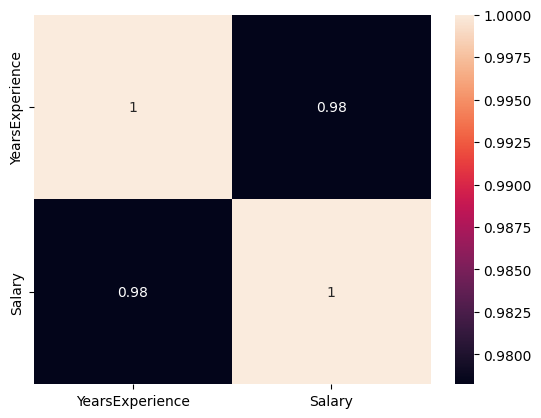

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.show()

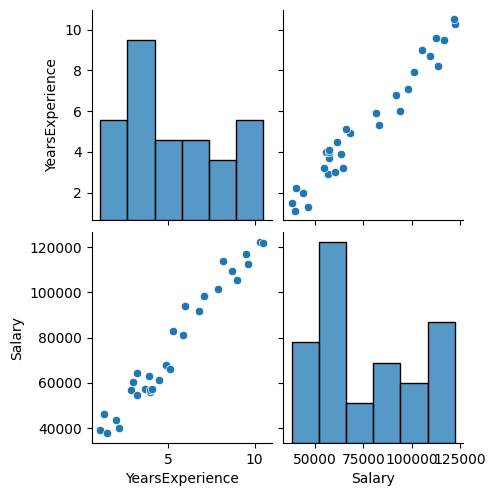

In [ ]:
sns.pairplot(df)
plt.show()

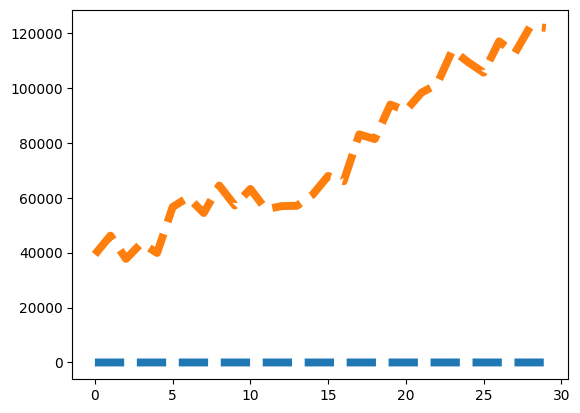

In [ ]:
plt.plot(df,linestyle = '--', linewidth='5.7')
plt.show()

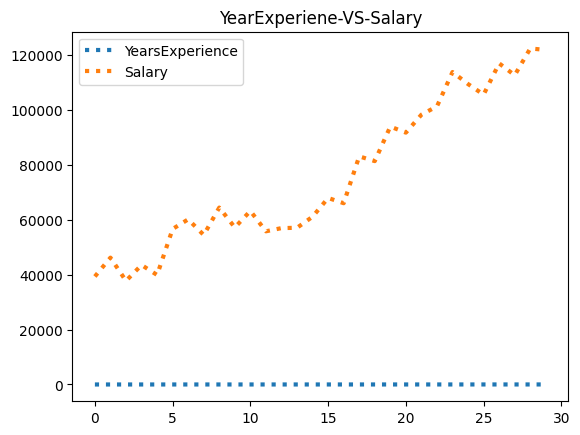

In [ ]:
df.plot.line(linestyle = ':', linewidth='3')

plt.title('YearExperiene-VS-Salary')
plt.show()


Independent and Dependent Variables



In [ ]:
X=df.drop('Salary',axis=1)



In [ ]:
y=df.Salary



In [ ]:
X.head()


,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [ ]:
y.head()

0    39343
1    46205
2    37731
3    43525
4    39891
Name: Salary, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.20)

In [ ]:
print(X_train.shape)

(24, 1)


In [ ]:
print(X_test.shape)


(6, 1)


model fitting

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
LR = LinearRegression()

In [ ]:
LR.fit(X_train,y_train)

LinearRegression()

In [ ]:
LR.intercept_   # beta 0


26780.09915062818

In [ ]:
LR.intercept_   # beta 0


26780.09915062818

In [ ]:
LR.coef_   # beta 0


array([9312.57512673])

prediction

In [ ]:
y_pred = LR.predict(X_test)

In [ ]:
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [ ]:
y_test

2      37731
28    122391
13     57081
10     63218
26    116969
24    109431
Name: Salary, dtype: int64

Evaluation

In [ ]:
from sklearn import metrics

In [ ]:
R2 = metrics.r2_score(y_test,y_pred)

In [57]:
R2

0.988169515729126

In [60]:
print(metrics.mean_absolute_error(y_test,y_pred))

2446.1723690465055


In [61]:
print(metrics.mean_squared_error(y_test,y_pred))

12823412.298126549


In [63]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

3580.979237321343


In [65]:
print(LR.predict([[5]]))

[73342.97478427]


checking assumptions

In [66]:
error = y_test-y_pred

In [67]:
error

2    -3017.961841
28    -308.622956
13   -7880.657170
10     118.857855
26    1719.437145
24    1631.497247
Name: Salary, dtype: float64

no autocorrelation

In [69]:
import statsmodels.api as smt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

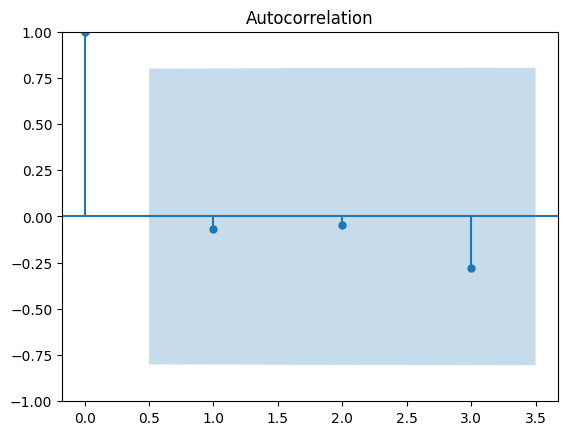

In [71]:
acf = plot_acf(error)
plt.show()

normality

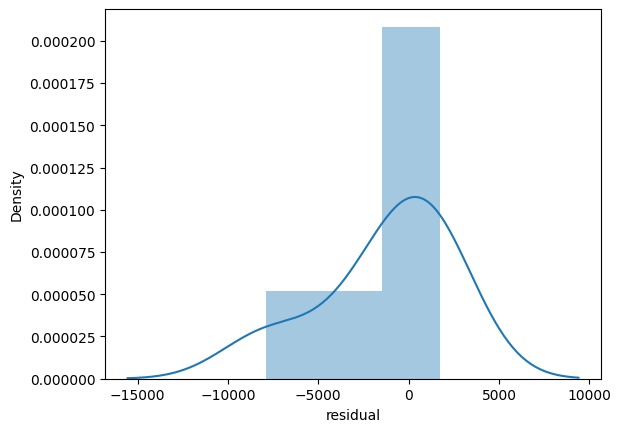

In [72]:
sns.distplot(error)
plt.xlabel('residual')
plt.show()


linearity

In [75]:
sns.regplot(X,y)
plt.show()

TypeError: regplot() takes from 0 to 1 positional arguments but 2 were given

TypeError: lineplot() takes from 0 to 1 positional arguments but 2 were given

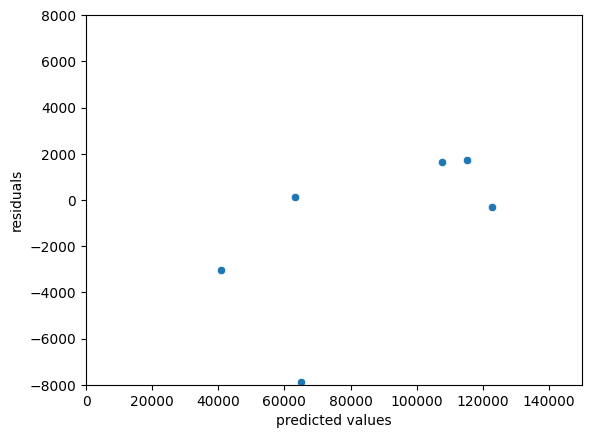

In [78]:
sns.scatterplot(x=y_pred,y=error)
plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.xlim([0,150000])
plt.ylim([-8000,8000])
sns.lineplot([0,150000],[0,0],color='blue')
plt.show()

multicolinearity

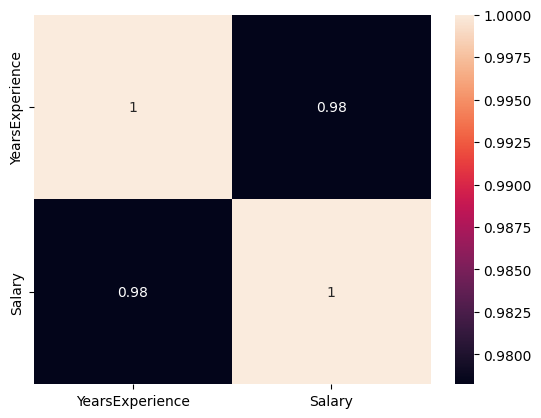

In [77]:
sns.heatmap(df.corr(),annot=True)
plt.show()